# Practical 1

#### AIM : Write a python program to plot word cloud for a wikipedia page of any topic. 

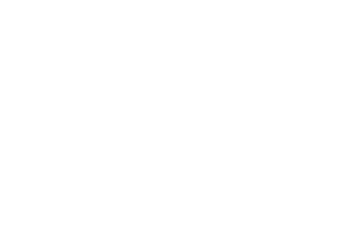

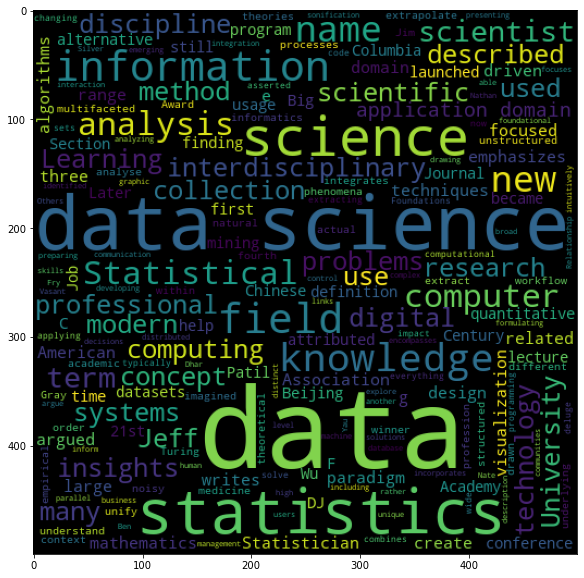

In [5]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import wikipedia as wp
result=wp.page("data science")
final_result=result.content
#print(final_result)
def plot_wordcloud(wc):
    plt.axis('off')
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.show()
   
wc=WordCloud(width=500,height=500,background_color="black",random_state=10,stopwords=STOPWORDS).generate(final_result)
wc.to_file("wordcloud.png")
plot_wordcloud(wc)

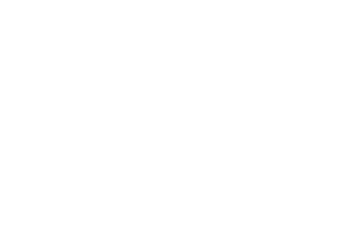

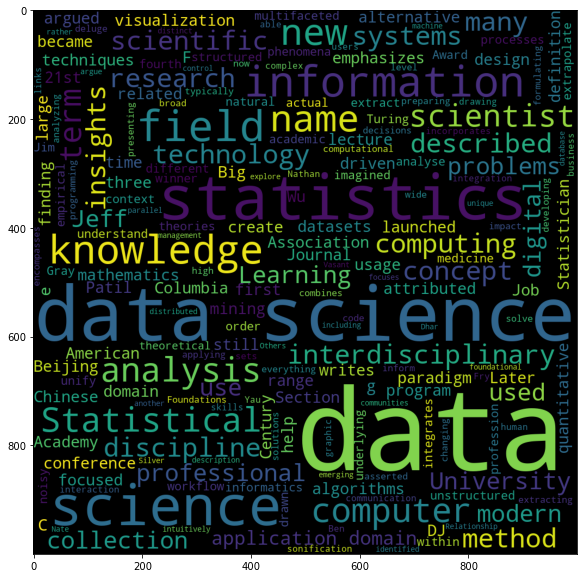

In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import wikipedia as wp

result=wp.page("data science")
cont=result.content
def plott(wc):
    plt.axis("off")
    plt.figure(figsize=(10,10))
    plt.imshow(wc)
    plt.show()
wc=WordCloud(height=1000,width=1000,background_color='black',random_state=10,stopwords=STOPWORDS).generate(cont)
wc.to_file("word_file.png")
plott(wc)

In [4]:
pip install wikipedia


  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11689 sha256=dbf3243625bbf2fa73de1fe2f45d91eb38f5e0813774ed80b99ac8d908bfe360
  Stored in directory: c:\users\naikt\appdata\local\pip\cache\wheels\07\93\05\72c05349177dca2e0ba31a33ba4f7907606f7ddef303517c6a
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


# Practical No 2

### Write a python program to perform Web Scrapping 
 


###### •	Html scrapping- use Beautiful Soup 


In [6]:
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
url="https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area"

page=urlopen(url)
html_page=page.read().decode("utf-8")
soup=BeautifulSoup(html_page,"html.parser")
table=soup.find('table',class_="wikitable sortable")
SrNo=[]
country=[]
area=[]
rows=table.find("tbody").find_all("tr")
for row in rows:
    cells=row.find_all("td")
    if(cells):
        SrNo.append(cells[0].get_text().strip("\n"))
        country.append(cells[1].get_text().strip("\n").strip("\xa0").strip("*"))
        area.append(cells[2].get_text().strip("\n").replace(",",''))
df=pd.DataFrame()
df["ID"]=SrNo
df["Country"]=country
df["Area"]=area
print(df.head(20))
df.to_csv("data.csv",index=False)

    ID       Country      Area
0    1        Russia  13129142
1    2         China   9615222
2    3         India   3287263
3    4    Kazakhstan   2544900
4    5  Saudi Arabia   2149690
5    6          Iran   1648195
6    7      Mongolia   1564110
7    8     Indonesia   1502029
8    9      Pakistan    881913
9   10        Turkey    759592
10  11       Myanmar    676578
11  12   Afghanistan    652230
12  13         Yemen    527968
13  14      Thailand    513120
14  15  Turkmenistan    488100
15  16    Uzbekistan    447400
16  17          Iraq    438317
17  18         Japan    377930
18  19       Vietnam    331212
19  20      Malaysia    330803


In [14]:
import pandas as pd 
from urllib.request import urlopen
from bs4 import BeautifulSoup

url="https://en.wikipedia.org/wiki/List_of_Asian_countries_by_area"
page=urlopen(url)
htmlpage=page.read().decode("utf-8")
soup=BeautifulSoup(htmlpage,"html.parser")
table=soup.find("table",class_="wikitable sortable jquery-tablesorter")
rows=table.find_all(t)


##### •	json scrapping

In [7]:
import pandas as pd
import urllib , json
# (user information)
url="https://api.github.com/users?since=100"
response=urllib.request.urlopen(url)
data=json.loads(response.read())
login=[]
id=[]
avatar=[]
for item in data:
    if "login" in item.keys():
        login.append(item['login'])
    else:
        login.append('NA')
    if "id" in item.keys():
        id.append(item['id'])
    else:
        id.append('NA')
    if "avatar_url" in item.keys():
        avatar.append(item['avatar_url'])
    else:
        avatar.append('NA')
df=pd.DataFrame()
df['Login']=login
df['ID']=id
df['Avatar']=avatar
df.head(10)


,Login,ID,Avatar
0,jvantuyl,101,https://avatars.githubusercontent.com/u/101?v=4
1,BrianTheCoder,102,https://avatars.githubusercontent.com/u/102?v=4
2,freeformz,103,https://avatars.githubusercontent.com/u/103?v=4
3,hassox,104,https://avatars.githubusercontent.com/u/104?v=4
4,automatthew,105,https://avatars.githubusercontent.com/u/105?v=4
5,queso,106,https://avatars.githubusercontent.com/u/106?v=4
6,lancecarlson,107,https://avatars.githubusercontent.com/u/107?v=4
7,drnic,108,https://avatars.githubusercontent.com/u/108?v=4
8,lukesutton,109,https://avatars.githubusercontent.com/u/109?v=4
9,danwrong,110,https://avatars.githubusercontent.com/u/110?v=4


# Practical No 3

# Practical No 4

#### Exploratory data analysis in Python using Titanic Dataset 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
titanic_cleaned=titanic.drop(['Name','Ticket','Fare','Cabin','PassengerId'],axis=1)
titanic_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


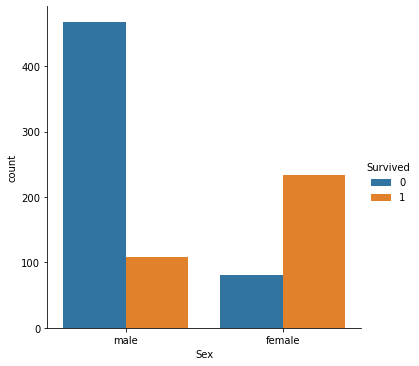

In [20]:
sns.catplot(x="Sex",hue="Survived",kind='count',data=titanic_cleaned)


In [21]:
titanic_cleaned.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

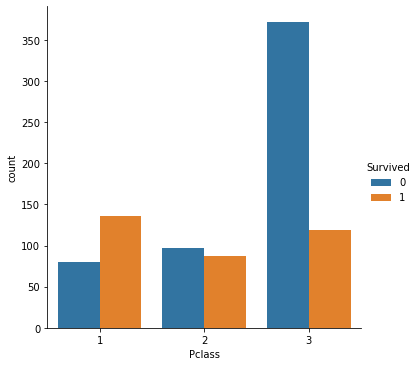

In [22]:
sns.catplot(x="Pclass",hue="Survived",kind='count',data=titanic_cleaned)

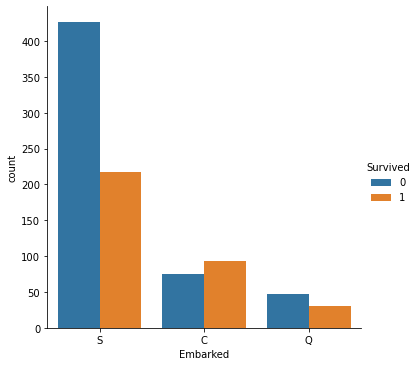

In [23]:
sns.catplot(x="Embarked",hue="Survived",kind='count',data=titanic_cleaned)

In [24]:
titanic.groupby(['Sex',"Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [25]:
group1=titanic.groupby(['Sex',"Survived"])

In [26]:
gender_survived=group1.size().unstack() #convert rows into columns ,columns into row
gender_survived

Survived,0,1
Sex,,
female,81,233
male,468,109


<AxesSubplot:xlabel='Survived', ylabel='Sex'>

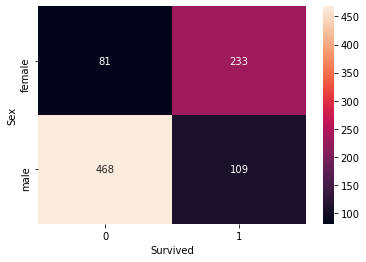

In [27]:
sns.heatmap(gender_survived,annot=True,fmt='d')

In [28]:
group2=titanic_cleaned.groupby(['Pclass','Survived'])
Pclass_survived=group2.size().unstack()
Pclass_survived

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

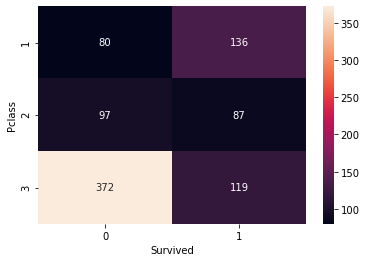

In [29]:
sns.heatmap(Pclass_survived,annot=True,fmt='d')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

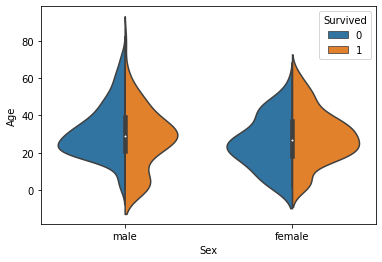

In [30]:
#violin plot-distribution of data  separate diagram of surived and non survuved across age
sns.violinplot(x="Sex" ,y="Age",hue="Survived",data=titanic_cleaned,split=True)

In [31]:
print("Oldest Person on Board:",titanic_cleaned['Age'].max())

Oldest Person on Board: 80.0


In [32]:
print("Youngest Person on Board:",titanic_cleaned['Age'].min())

Youngest Person on Board: 0.42


In [33]:
print("Mean age",titanic_cleaned['Age'].mean())

Mean age 29.69911764705882


In [34]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [35]:
def impute(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return round(titanic_cleaned[titanic_cleaned['Pclass']==1]['Age'].mean())
        elif Pclass==2:
            return round(titanic_cleaned[titanic_cleaned['Pclass']==2]['Age'].mean())
        else:
            return round(titanic_cleaned[titanic_cleaned['Pclass']==3]['Age'].mean())
    else:
        return Age
titanic_cleaned['Age']=titanic_cleaned[['Age','Pclass']].apply(impute,axis=1)

In [36]:
titanic_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [37]:
titanic_cleaned.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
5,0,3,male,25.0,0,0,Q
6,0,1,male,54.0,0,0,S
7,0,3,male,2.0,3,1,S
8,1,3,female,27.0,0,2,S
9,1,2,female,14.0,1,0,C


In [38]:
titanic_cleaned.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.050156,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.404262,0.083081,0.018443
Age,-0.050156,-0.404262,1.000000,-0.243549,-0.175264
SibSp,-0.035322,0.083081,-0.243549,1.000000,0.414838
Parch,0.081629,0.018443,-0.175264,0.414838,1.000000


<AxesSubplot:>

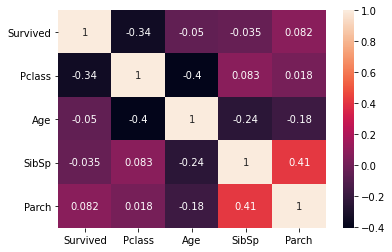

In [39]:
sns.heatmap(titanic_cleaned.corr(method='pearson'),annot=True,vmax=1)

# Practical No 5

#### 1.	Write a python program to build a regression model that could predict the salary of an employee  from the given experience and visualize univariate linear regression on it. 

In [40]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [41]:
x,y,coef=datasets.make_regression(n_samples=100,n_features=1,n_informative=1,coef=True,noise=10,random_state=0)
x=np.interp(x,(x.min(),x.max()),(0,20))
len(x)

100

In [42]:
y=np.interp(y,(y.min(),y.max()),(20000,150000))
len(y)

100

Text(0.5, 1.0, 'EX VS Salary')

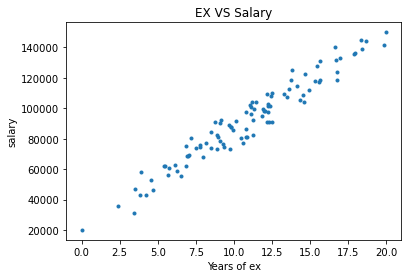

In [43]:
plt.plot(x,y,'.',label="Training Data")
plt.xlabel('Years of ex')
plt.ylabel("salary")
plt.title("EX VS Salary")

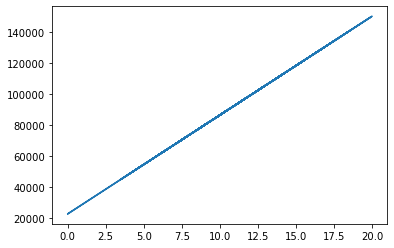

In [44]:
from sklearn.linear_model import LinearRegression
reg_model=LinearRegression()
reg_model.fit(x,y)
y_pred=reg_model.predict(x)
plt.plot(x,y_pred)

Text(0.5, 1.0, 'EX VS Salary')

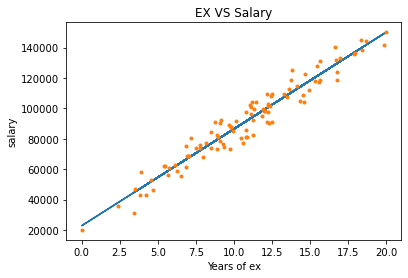

In [45]:
reg_model=LinearRegression()
reg_model.fit(x,y)
y_pred=reg_model.predict(x)
plt.plot(x,y_pred)
plt.plot(x,y,'.',label="Training Data")
plt.xlabel('Years of ex')
plt.ylabel("salary")
plt.title("EX VS Salary")

In [46]:
#predicting possible salary for experience 3 years
x1=[[3.0]]
y1=reg_model.predict(x1)
print(y1)

[41858.09967046]


# Practical No 8

### KNN Algorithm

In [56]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()


In [57]:
breast_cancer=load_breast_cancer()
x=pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)# load the features(independent variables)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
x=x[["mean area","mean compactness"]]
x.head()

,mean area,mean compactness
0,1001.0,0.27760
1,1326.0,0.07864
2,1203.0,0.15990
3,386.1,0.28390
4,1297.0,0.13280


In [59]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mean area         569 non-null    float64
 1   mean compactness  569 non-null    float64
dtypes: float64(2)
memory usage: 9.0 KB


In [60]:
y=pd.Categorical.from_codes(breast_cancer.target,breast_cancer.target_names)
y

['malignant', 'malignant', 'malignant', 'malignant', 'malignant', ..., 'malignant', 'malignant', 'malignant', 'malignant', 'benign']
Length: 569
Categories (2, object): ['malignant', 'benign']

In [61]:
y=pd.get_dummies(y,drop_first=True)
y.head()

,benign
0,0
1,0
2,0
3,0
4,0


In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")#eucledian - distane between 
knn.fit(x_train,y_train)

<ipython-input-62-b1f8be5148b8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


KNeighborsClassifier(metric='euclidean')

<AxesSubplot:xlabel='mean area', ylabel='mean compactness'>

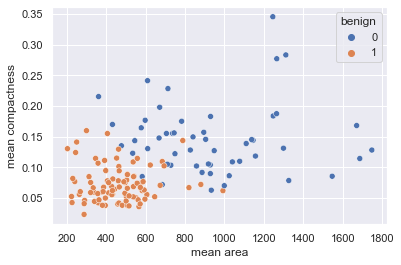

In [63]:
sns.scatterplot(x='mean area',y="mean compactness",hue='benign',data=x_test.join(y_test,how='outer'))


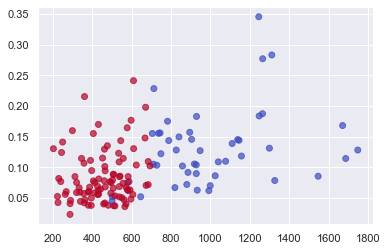

In [65]:
y_pred=knn.predict(x_test)
plt.scatter(x_test['mean area'],x_test['mean compactness'],c=y_pred,cmap="coolwarm",alpha=0.7)

In [66]:
cf=confusion_matrix(y_test,y_pred)
cf

array([[39, 13],
       [ 8, 83]], dtype=int64)

[Text(0, 0.5, 'Malignant'), Text(0, 1.5, 'Benign')]

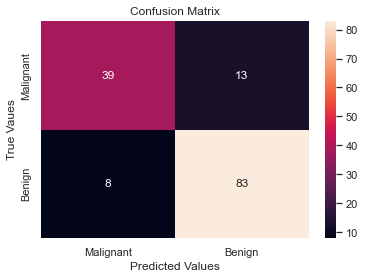

In [53]:
label=["True Negative","False Positive","False Negative","True Positive"]
labels=np.asarray(label).reshape(2,2)
categories=['Zero','One']
ax=plt.subplot()
sns.heatmap(cf,annot=True,ax=ax)#ax is subplot
ax.set_xlabel("Predicted Values")
ax.set_ylabel("True Vaues")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Malignant","Benign"])
ax.yaxis.set_ticklabels(["Malignant","Benign"])

In [67]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred,labels=[1,0]).reshape(-1)
print("Values for TP,FN,FP,TN : ",tp,fn,fp,tn)

Values for TP,FN,FP,TN :  83 8 13 39


In [68]:
Accuracy=(tp+tn)/(tp+tn+fp+fn)
print(Accuracy)

0.8531468531468531


In [69]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.8877005347593583

In [70]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.831043956043956